**TASK-1**

Exploratory Data Analysis (EDA) on Retail Sales Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"/content/retail_sales_dataset.csv"
retail_data = pd.read_csv(file_path)

In [ ]:
# Data Cleaning
retail_data['Date'] = pd.to_datetime(retail_data['Date'])  # Convert 'Date' column to datetime
missing_values = retail_data.isnull().sum()  # Check for missing values

In [ ]:
# Descriptive Statistics
desc_stats = retail_data.describe(include='all')
mode_values = retail_data.mode().iloc[0]  # Get mode for each column
print("Missing Values:\n", missing_values)
print("Descriptive Statistics:\n", desc_stats)
print("Mode Values:\n", mode_values)

Missing Values:
 Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64
Descriptive Statistics:
         Transaction ID                           Date Customer ID  Gender  \
count      1000.000000                           1000        1000    1000   
unique             NaN                            NaN        1000       2   
top                NaN                            NaN     CUST001  Female   
freq               NaN                            NaN           1     510   
mean        500.500000  2023-07-03 00:25:55.200000256         NaN     NaN   
min           1.000000            2023-01-01 00:00:00         NaN     NaN   
25%         250.750000            2023-04-08 00:00:00         NaN     NaN   
50%         500.500000            2023-06-29 12:00:00         NaN     NaN   
75%         750.250000            2023-10-04 00:00:00 

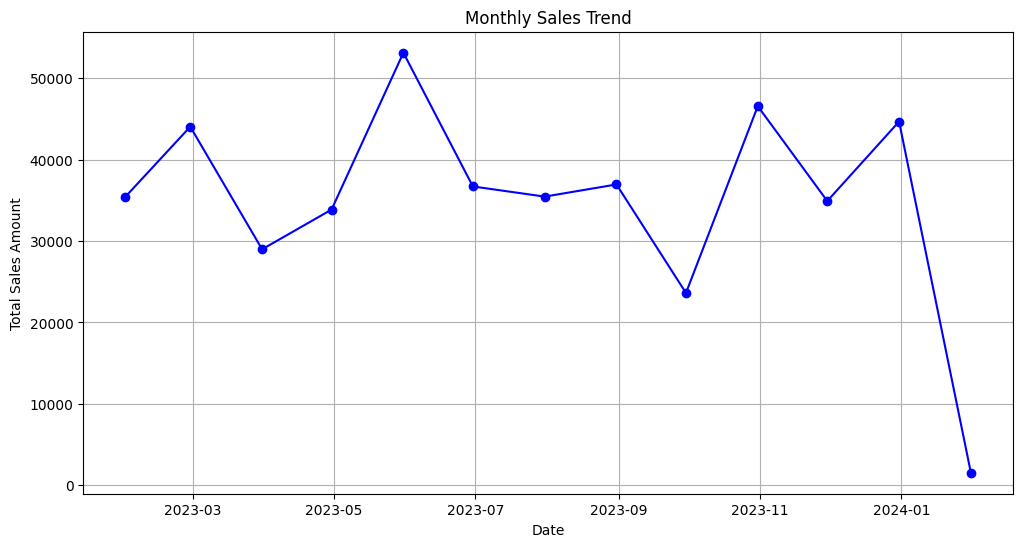

In [ ]:
# Time Series Analysis: Monthly Sales Trends
monthly_sales = retail_data.set_index('Date').resample('ME')['Total Amount'].sum()
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='b')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.show()

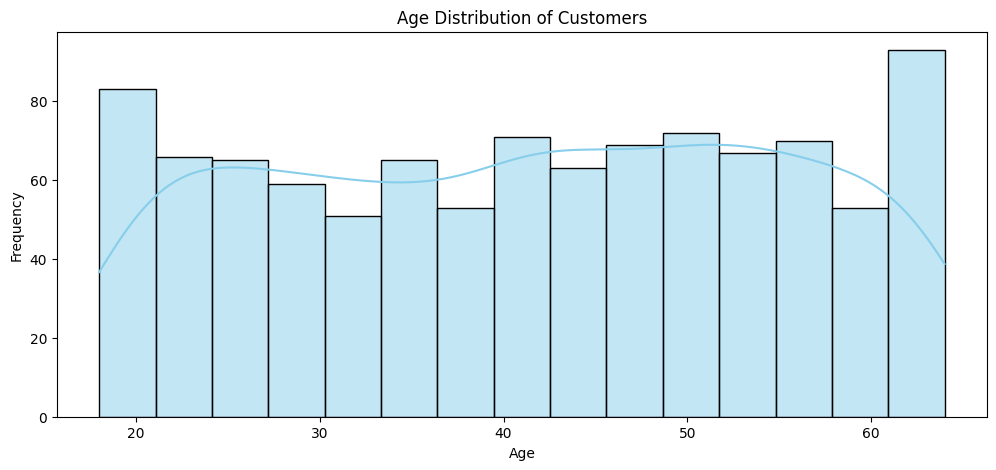

In [ ]:
# Customer Demographics and Purchasing Behavior
# Age Distribution
plt.figure(figsize=(12, 5))
sns.histplot(retail_data['Age'], bins=15, kde=True, color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-6-9436f4e42c10>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=retail_data, palette='viridis')


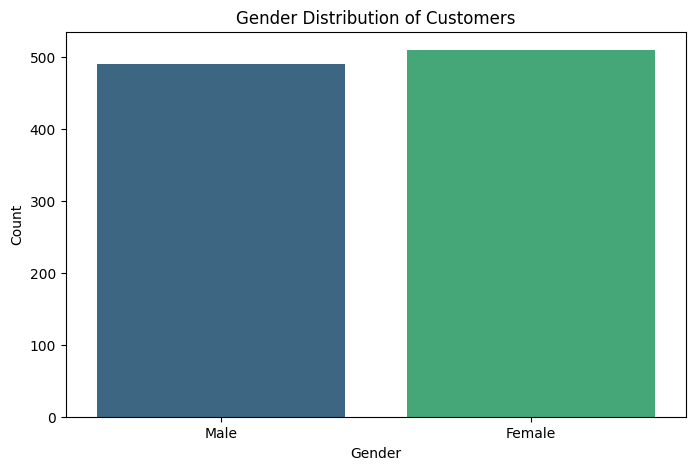

In [ ]:
# Gender Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=retail_data, palette='viridis')
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

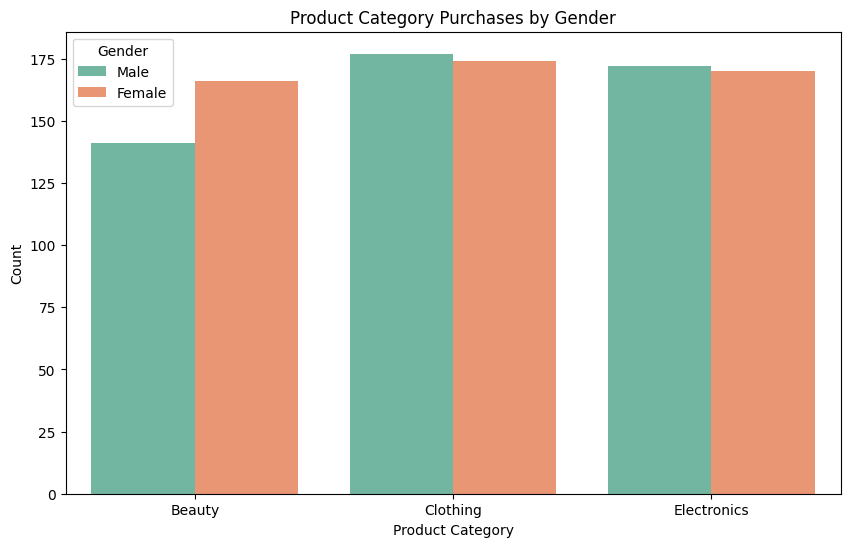

In [ ]:
# Product Category Purchases by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Product Category', hue='Gender', data=retail_data, palette='Set2')
plt.title('Product Category Purchases by Gender')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

<ipython-input-8-4fca74ade1fa>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_spending_by_age_group = retail_data.groupby('Age Group')['Total Amount'].mean()


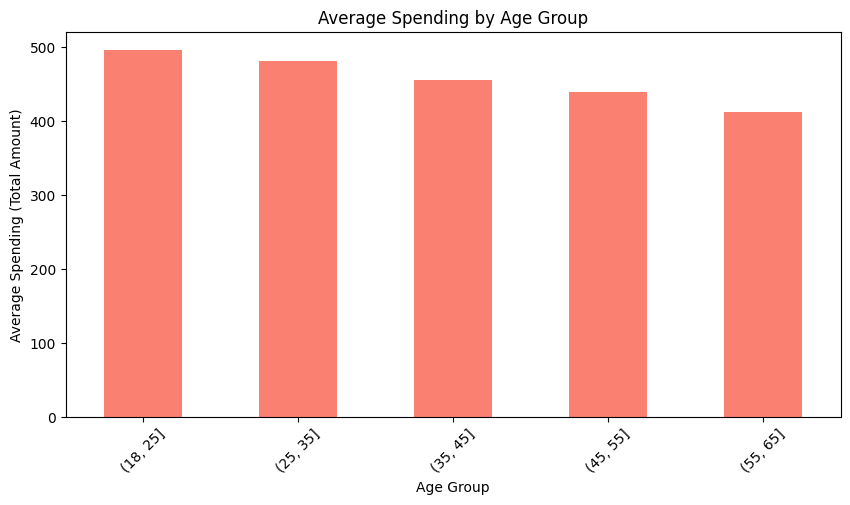

In [ ]:
# Average Spending by Age Group
age_bins = [18, 25, 35, 45, 55, 65]
retail_data['Age Group'] = pd.cut(retail_data['Age'], bins=age_bins)
avg_spending_by_age_group = retail_data.groupby('Age Group')['Total Amount'].mean()
plt.figure(figsize=(10, 5))
avg_spending_by_age_group.plot(kind='bar', color='salmon')
plt.title('Average Spending by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Spending (Total Amount)')
plt.xticks(rotation=45)
plt.show()

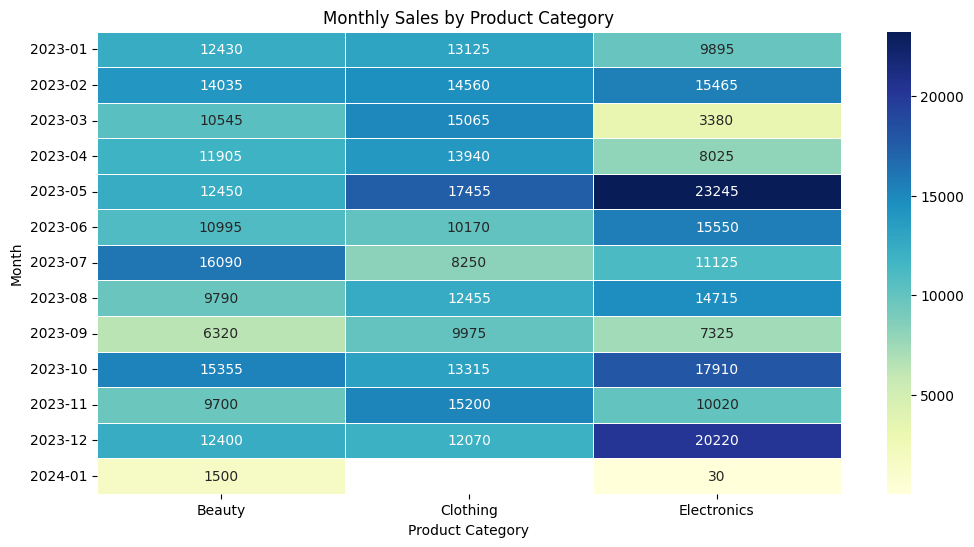

In [ ]:
# Heatmap of Sales by Product Category and Month
retail_data['Month'] = retail_data['Date'].dt.to_period('M')
category_month_sales = retail_data.groupby(['Month', 'Product Category'])['Total Amount'].sum().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(category_month_sales, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)
plt.title('Monthly Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Month')
plt.show()

In [ ]:
# Recommendations
print("Recommendations:")
print("1. Target marketing for the age group with the highest average spending.")
print("2. Increase stock for popular products during peak sales months.")
print("3. Customize offers based on gender preferences for different product categories.")

Recommendations:
1. Target marketing for the age group with the highest average spending.
2. Increase stock for popular products during peak sales months.
3. Customize offers based on gender preferences for different product categories.
